# MNIST Digit Recognition
## 2-Layer Feed-Forward Neural Networks

We'll recognize handwritten digits using a shallow neural network on top of Keras framework.

In [1]:
import time

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras.callbacks as cb

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
%matplotlib inline

## Load Data

Download MNIST dataset.

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Visualize random images.

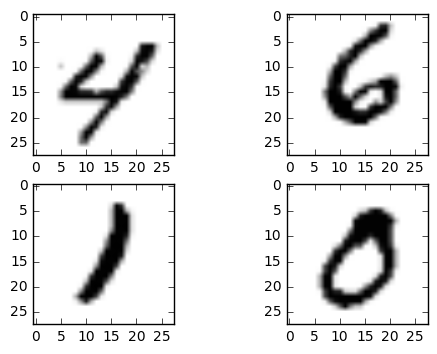

In [6]:
plt.subplot(221)
plt.imshow(X_train[89], cmap="Greys")
plt.subplot(222)
plt.imshow(X_train[90], cmap="Greys")
plt.subplot(223)
plt.imshow(X_train[78], cmap="Greys")
plt.subplot(224)
plt.imshow(X_train[75], cmap="Greys")

Flatten 2D data to 1D (28 x 28 = 784). Rescale pixel intensities to [0..1] range.

In [7]:
X_train = X_train.reshape(60000, 784).astype("float32")
X_test = X_test.reshape(10000, 784).astype("float32")
print (len(X_train[89]))


784


In [8]:
X_train /= 255
X_test /= 255

We're dealing with handwritten digit classification, therefore the classes are 0, 1, 2, ... 9 (total: 10).

In [9]:
num_classes = 10

Convert class vectors to binary class matrices.

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_train = np_utils.to_categorical(y_train, num_classes)

In [12]:
y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [13]:
y_test = np_utils.to_categorical(y_test, num_classes)

## Build Neural Model

Our network will have an input layer, 2 hidden layers and one output layer:

1. Input: 784 units (one for each pixel).
2. Hidden 1: 500 units, ReLU activation, 40% dropout.
3. Hidden 2: 300 units, ReLU activation, 40% dropout.
4. Output: 10 units, Softmax activation.

(layer configuration taken from [Yann LeCun's website](http://yann.lecun.com/exdb/mnist/) citing Hinton's unpublished work)

In [14]:
model = Sequential()

model.add(Dense(500, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [15]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 500)           392500      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 500)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 500)           0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 300)           150300      dropout_1[0][0]                  
___________________________________________________________________________________________

## Train Model

In [16]:
batch_size = 128
num_epochs = 15

In [17]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=RMSprop(),
    metrics=["accuracy"]
)

In [18]:
start_time = time.time()

In [19]:
history = model.fit(
    X_train,
    y_train,
    nb_epoch=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s - loss: 0.3102 - acc: 0.9045 - val_loss: 0.1148 - val_acc: 0.9631
Epoch 2/15
60000/60000 [==============================] - 6s - loss: 0.1419 - acc: 0.9569 - val_loss: 0.0844 - val_acc: 0.9728
Epoch 3/15
60000/60000 [==============================] - 7s - loss: 0.1101 - acc: 0.9676 - val_loss: 0.0878 - val_acc: 0.9755
Epoch 4/15
60000/60000 [==============================] - 7s - loss: 0.0958 - acc: 0.9719 - val_loss: 0.0858 - val_acc: 0.9759
Epoch 5/15
60000/60000 [==============================] - 7s - loss: 0.0852 - acc: 0.9755 - val_loss: 0.0741 - val_acc: 0.9787
Epoch 6/15
60000/60000 [==============================] - 7s - loss: 0.0791 - acc: 0.9776 - val_loss: 0.0723 - val_acc: 0.9829
Epoch 7/15
60000/60000 [==============================] - 7s - loss: 0.0731 - acc: 0.9794 - val_loss: 0.0834 - val_acc: 0.9815
Epoch 8/15
60000/60000 [==============================] - 7s 

In [20]:
end_time = time.time()

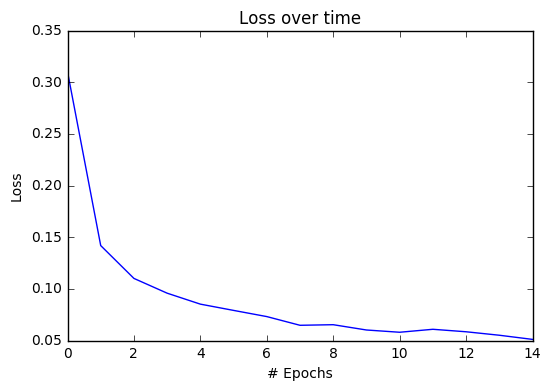

In [21]:
plt.plot(history.history["loss"])
plt.xlabel("# Epochs")
plt.ylabel("Loss")
plt.title("Loss over time")
plt.show()

## Evaluate Model

In [22]:
training_score = model.evaluate(X_train, y_train, batch_size=16, verbose=0)
test_score = model.evaluate(X_test, y_test, batch_size=16, verbose=0)

In [23]:
print("Training duration: {0:.1f} sec".format(end_time - start_time))
print("Training accuracy: {0:.3f}%".format(training_score[1] * 100))
print("Test accuracy: {0:.3f}%".format(test_score[1] * 100))

Training duration: 109.4 sec
Training accuracy: 99.628%
Test accuracy: 98.330%
